# PROJECT 2 - Covid (csv)

## 1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Read the database

In [3]:
df = pd.read_csv("data/casos_tecnica_provincia.csv")
df.head()

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,A,2020-01-01,0,0,0,0,0,0
1,AB,2020-01-01,0,0,0,0,0,0
2,AL,2020-01-01,0,0,0,0,0,0
3,AV,2020-01-01,0,0,0,0,0,0
4,B,2020-01-01,0,0,0,0,0,0


## 3. Exploratory analysis

In [4]:
df.sample()

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
23350,MU,2021-03-16,52,31,0,21,0,0


In [5]:
df.shape

(43778, 8)

In [6]:
df.columns

Index(['provincia_iso', 'fecha', 'num_casos', 'num_casos_prueba_pcr',
       'num_casos_prueba_test_ac', 'num_casos_prueba_ag',
       'num_casos_prueba_elisa', 'num_casos_prueba_desconocida'],
      dtype='object')

## 4. Filtering the Database:

In [7]:
df_filtered = df[(df['provincia_iso'] == 'M') & (df['fecha'] >= '2020-01-01') & (df['fecha'] <= '2020-12-31')]
df_filtered.head()

,provincia_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
27,M,2020-01-01,1,1,0,0,0,0
80,M,2020-01-02,0,0,0,0,0,0
133,M,2020-01-03,0,0,0,0,0,0
186,M,2020-01-04,0,0,0,0,0,0
239,M,2020-01-05,0,0,0,0,0,0


## 5. General cleaning:

In [8]:
df_filtered.drop(columns=["num_casos_prueba_pcr", "num_casos_prueba_test_ac", "num_casos_prueba_ag", "num_casos_prueba_elisa", "num_casos_prueba_desconocida"], axis = 1, inplace = True)

In [9]:
pd.isna(df_filtered).sum()

provincia_iso    0
fecha            0
num_casos        0
dtype: int64

In [10]:
df_filtered.duplicated().sum()

0

In [11]:
# Convert "fecha" column to datetime format
df_filtered['fecha'] = pd.to_datetime(df_filtered['fecha'])

# Extract the month into a new column
df_filtered['mes_numero'] = df_filtered['fecha'].dt.month

# Extract year into a new column
df_filtered['año'] = df_filtered['fecha'].dt.year

# Replace each value in the 'Month' column with a string representing the corresponding month
months_dict = {1: 'January', 2: 'February', 3: 'March (Covid)', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df_filtered['mes_nombre'] = df_filtered['mes_numero'].replace(months_dict)

## 6. Plot:

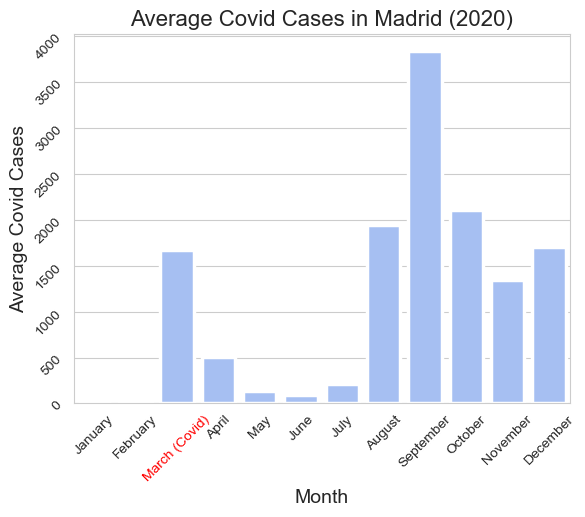

In [12]:
# Set plot style
sns.set_style('whitegrid')

# Create the plot with hue for each year
ax = sns.barplot(data=df_filtered, x='mes_nombre', y='num_casos', linewidth=2.5, ci=None, color=sns.color_palette('coolwarm')[1])

# Add plot title and axis labels
ax.set_title('Average Covid Cases in Madrid (2020)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Covid Cases', fontsize=14)

# Set tick label font size and rotation
ax.tick_params(labelsize=10, rotation=45)

# Set the color for the March label
ax.get_xticklabels()[2].set_color('red')

# Display the plot
plt.show()